
# Pyaudio Handouts
<br>
<i>"ASAS TIG-pyaudio"</i>
<br>
<br>
2017.5.8
    
---

## Introduction to python


- Python
    

 > Python is one of the most popular programming languages for data science. 


- Environment Setup


> The easiest way to setting up a Python environment is to install the Anaconda for Python 3. Anaconda bundles all the useful Python packages for data science, math and engineering.


- Package Management 
    

> You can manage your Python package by typing the following in the command-line:


- Open Lab and Run Code
 

> Jupyter Notebook exists to develop open-source software, open-standards, and services for interactive computing across dozens of programming languages. Jupyter notebook allows you to create documents that contain Python code, LATEX and descriptive text.
To open Jupyter Notebook, open the Anaconda and click the launch for Jupyte Notebook or typing "jupyter notebook" in the command-line

## Basics of python


### Hello world!

In [1]:
print("Hello world!")

Hello world!



### Basic data types

* Numbers:


In [2]:
x = 5
print(x)
print(type(x))

5
<class 'int'>


In [3]:
print(x + 1)  # Addition
print(x - 1)  # Substraction
print(x * 2)  # Multiplication
print(x / 2)  # Division
print(x ** 2) # Exponentiation

6
4
10
2.5
25


In [4]:
x += 1
print(x)

x *= 2
print(x)

6
12


In [5]:
y = 2.5

print(type(y))
print(y + 1)  # Addition
print(y - 1)  # Substraction
print(y * 2)  # Multiplication
print(y / 2)  # Division
print(y ** 2) # Exponentiation

<class 'float'>
3.5
1.5
5.0
1.25
6.25


* Booleans:


In [6]:
T = True 
F = False

print(type(T))

print(T and F)
print(T or F)
print(not F)
print(T != F)
print(T == F)

<class 'bool'>
False
True
True
True
False


* Strings:

In [7]:
h = 'hello'
w = 'world'

print(h)
print(type(h))
print(len(h))


hello
<class 'str'>
5


In [8]:
hw = h + ' ' + w
hww = h + ' ' + w + ' ' + w

print(hw)
print(hww)

hello world
hello world world


In [9]:
hw123 = '%s %s %d' %(h, w, 123)

print(hw123)

hello world 123





### Containers

* Lists:

In [10]:
x = [1, 2, 3, 4, 5]

print(x)
print(x[0])
print(x[1])
print(x[-1])
print(x[-2])
print(1 in x)
print(6 in x)

[1, 2, 3, 4, 5]
1
2
5
4
True
False


In [11]:
x[2] = 'hello'

print(x)

[1, 2, 'hello', 4, 5]


In [12]:
x.append(123)
print(x)

x.pop()
print(x)

x.pop(0)
print(x)

[1, 2, 'hello', 4, 5, 123]
[1, 2, 'hello', 4, 5]
[2, 'hello', 4, 5]


In [13]:
x = [1, 2, 3, 4, 5]

print(x[0:3])
print(x[2:])
print(x[:3])
print(x[:])
print(x[:-1])
print(x[::-1])

[1, 2, 3]
[3, 4, 5]
[1, 2, 3]
[1, 2, 3, 4, 5]
[1, 2, 3, 4]
[5, 4, 3, 2, 1]


* Loops:

In [14]:
character = ['a', 'b', 'c']

for ch in character:
    print(ch)
    
for index, ch in enumerate(character):
    print('%d %s' %(index, ch))

a
b
c
0 a
1 b
2 c


* Dictionary:

In [15]:
character = {'a' : 1, 'b' : 2, 'c' : 3}

print(character['a'])
print('a' in character)

1
True


character['a'] = 20
print(character['a'])

In [16]:
character = {'a' : 1, 'b' : 2, 'c' : 3}

for ch in character:
    print(character[ch])

1
2
3



### Function:

In [17]:
def compare(x, y):
    if(x > y):
        return 'x > y'
    elif(x < y):
        return 'x < y'
    else:
        return 'x = y'
print(compare(1, 5))

x < y


In [18]:
def sayhi(name, hi = False):
    if(hi):
        print('Hi %s' %(name))
    else:
        print('%s' %(name))

sayhi('Tom')
sayhi('Ben', hi = True)

Tom
Hi Ben



---

## I/O in python


### Create a file


First, open the file with
1. ```open(FILE, 'w+')```: 'w' means write, '+' means it will create a file if it doesn't exist yet.  
2. ```open(FIle, 'a+')```: 'a' means that it will append new text into the existing file.  

Then use ```write()``` to write something into the file.

In [19]:
f = open('newFile.txt', 'w+')
for i in range(5):
    f.write('Line #%d\n' % i)
f.close()


### Read a file


First, use ```open(FILE, 'r')``` to open the file with read mode, then  
1. ```f.read()``` to read the whole file.  
2. ```f.readlines()``` to read the file into a list whose element is a line of the file.

> To deal with files with commonly used file formats, we can utilize some off-the-shelf package like [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html).  
[Here](https://pandas.pydata.org/pandas-docs/stable/io.html) is a list for functions w.r.t. each format.

In [20]:
# 'r' means read
f = open('newFile.txt', 'r')
content = f.read()
# Reset the offset to 0 (re-read the file)
f.seek(0)
lines = f.readlines()
f.close()

In [21]:
print('Content (%d lines):' % len(lines))
print(content)

Content (5 lines):
Line #0
Line #1
Line #2
Line #3
Line #4



---
## Audio I/O


### pyaudio installation
<br>  

For <i>mac</i>:  
    
```
$ brew install portaudio 
$ pip install pyaudio
```   
For <i>windows</i>:
``` 
$ python -m pip install pyaudio
```
For other systems, please check pyaudio's [doc](https://people.csail.mit.edu/hubert/pyaudio/).


### Record sound

In [22]:
import pyaudio
import wave

def record(fileName, duration, silence=False, rate=44100, channels=2, chunk=1024, format=pyaudio.paInt16):
    p = pyaudio.PyAudio()
    stream = p.open(format=format, channels=channels, 
                    rate=rate, input=True, frames_per_buffer=chunk)
    if not silence:
        print('* Start recording')
    frames = []
    for i in range(int(rate / chunk * duration)):
        data = stream.read(chunk)
        frames.append(data)
    if not silence:
        print("* Done recording")
    stream.stop_stream()
    stream.close()
    # output
    wf = wave.open(fileName, 'wb')
    wf.setnchannels(channels)
    wf.setsampwidth(p.get_sample_size(format))
    wf.setframerate(rate)
    wf.writeframes(b''.join(frames))
    wf.close()
    p.terminate()


### Play sound

In [23]:
def play(fileName, chunk=1024):
    wf = wave.open(fileName, 'rb')
    p = pyaudio.PyAudio()
    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)
    data = wf.readframes(chunk)
    while data != b'':
        stream.write(data)
        data = wf.readframes(chunk)
        
    stream.stop_stream()
    stream.close()
    p.terminate()

```python
record('sound.wav', duration=5)
```

```python
play('sound.wav')
```

### Read .wav file into numpy array

In [24]:
from scipy.io.wavfile import read

fs, data = read('sound.wav')
print('Type of data:', type(data))
print('Sampling rate: %.1f' % fs)
print('Duration: %.2f' % (len(data) / fs))

Type of data: <class 'numpy.ndarray'>
Sampling rate: 8000.0
Duration: 2.08


---
## 2D plots in python
In this part we will introduce a powerful library Matplotlib for making 2D plots of arrays in Python.  

<center><img src='matplotlib.png' width='60%' /></center>


### Matplotlib installation
<br>

For <i>mac</i>:
```
$ pip install matplotlib

``` 
For <i>windows</i>:
```
$ pip install -U pip
$ pip install -U matplotlib
``` 


### Some examples
<br>

You can find more styles of plots in [Matplotlib_examples](https://matplotlib.org/gallery/index.html).

In [25]:
# First, import matplotlib.pyplot which covers various of functions you need.
import matplotlib.pyplot as plt
# Define an array
x = [1, 2, 3, 2, 0, 5]
# plot
plt.plot(x)
# add x label and y label
plt.ylabel('numbers')
plt.xlabel('index')
# remember to add .show() or it will only show [<matplotlib.lines.Line2D at XXXXXXX>]
plt.show()

<Figure size 640x480 with 1 Axes>

Text(0.5,1,'Hi')

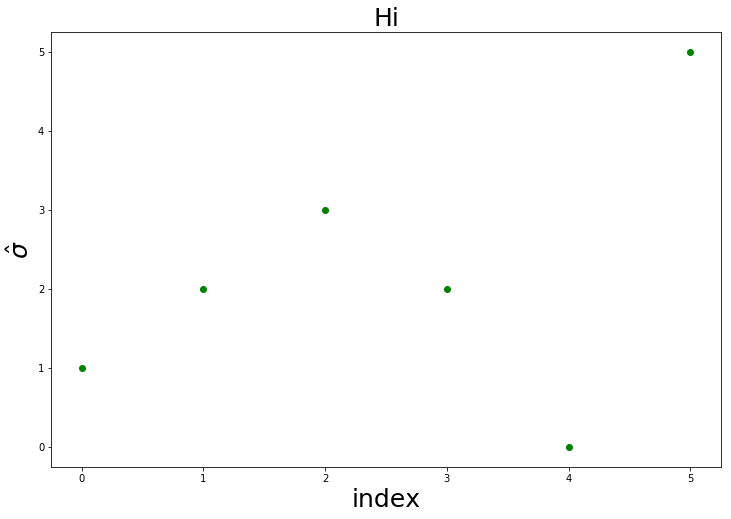

In [26]:
# If you don't want to add .show() everytime, you can add %matplotlib inline then you don't need to add .show() anymore
%matplotlib inline
# adjust the size
plt.figure(figsize=(12,8))
# change plotting style, you can also try 's', '-', 'o', '^', '*', 'b-', 'g^'
plt.plot(x, 'go')
# adjust fontsize
plt.xlabel('index', fontsize=25)
# label in latex format
plt.ylabel(r'$\hat{\sigma}$', fontsize=25)
# add title
plt.title('Hi', fontsize=25)


Change the style of plot

In [27]:
plt.style.use('ggplot')

<center><img src='style.png' width='60%' /></center>

Using subplot to plot figures in given configuration:

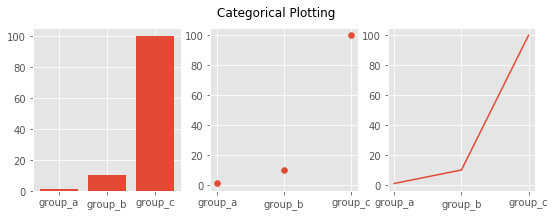

In [28]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))
# figure configuration: 1x3
plt.subplot(131)
# plot bar
plt.bar(names, values)
plt.subplot(132)
# scatter plot
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
# save imgage if you want
plt.savefig('example')


Let's plot audio frames:

In [29]:
# load audio data w/ scipy
# Using scipy
from scipy.io import wavfile
rate, data = wavfile.read('1.wav')
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  16000
Total samples (frames) =  (41351,)
[-12  -1   0 ...  29 233 278]


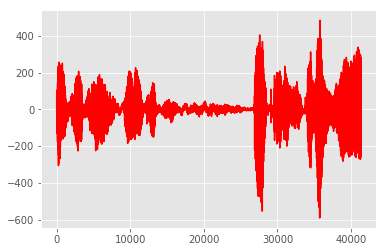

In [30]:
# plot audio frames
plt.plot(data, 'r-', )


Plot MFCC

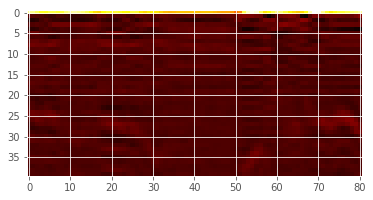

In [31]:
import librosa
import numpy as np
data = [float(i) for i in data]
data = np.array(data)
mfcc = librosa.feature.mfcc(data, sr = rate, n_mfcc=40)
plt.imshow(mfcc, cmap='hot', interpolation='nearest');

---
## Some useful examples

* Click here for [FFT](https://github.com/ryanwu87/ASAS/blob/master/FFT.py) ans [STFT](https://github.com/ryanwu87/ASAS/blob/master/STFT.py) examples! 
<br>
<br>
* Click here for [spectrogram](https://github.com/ryanwu87/ASAS/blob/master/Example1_spectrogram.py) example! 

---
## Exercise


* Tasking description:
<br>

> You are asked to transform an arbitrary wave file into a time-frequency plot. And the process should be done by using python. Notice that three different kinds of windows should be implemented necessarily. You may refer to lab1 PDF files for further details.
    


* Things to hand in:
<br>

> The only thing to turn in is your source code with appropriate comments. Suppose that everyone have done a great job on lab1, we ignore the discussion part.


* Scoring criteria
<br>

> Since several functions are well prepared. You may get the extra credits by creating your own functions.


* Due date:


> 5/15
    